In [1]:
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Distinct Column Names

In [4]:
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Unique Values of each column

In [5]:
from IPython.display import display

for col in df.columns:
    plot = df[col].value_counts().reset_index()
    display(plot)

,customerID,count
0,7590-VHVEG,1
1,3791-LGQCY,1
2,6008-NAIXK,1
3,5956-YHHRX,1
4,5365-LLFYV,1
...,...,...
7038,9796-MVYXX,1
7039,2637-FKFSY,1
7040,1552-AAGRX,1
7041,4304-TSPVK,1


,gender,count
0,Male,3555
1,Female,3488


,SeniorCitizen,count
0,0,5901
1,1,1142


,Partner,count
0,No,3641
1,Yes,3402


,Dependents,count
0,No,4933
1,Yes,2110


,tenure,count
0,1,613
1,72,362
2,2,238
3,3,200
4,4,176
...,...,...
68,28,57
69,39,56
70,44,51
71,36,50


,PhoneService,count
0,Yes,6361
1,No,682


,MultipleLines,count
0,No,3390
1,Yes,2971
2,No phone service,682


,InternetService,count
0,Fiber optic,3096
1,DSL,2421
2,No,1526


,OnlineSecurity,count
0,No,3498
1,Yes,2019
2,No internet service,1526


,OnlineBackup,count
0,No,3088
1,Yes,2429
2,No internet service,1526


,DeviceProtection,count
0,No,3095
1,Yes,2422
2,No internet service,1526


,TechSupport,count
0,No,3473
1,Yes,2044
2,No internet service,1526


,StreamingTV,count
0,No,2810
1,Yes,2707
2,No internet service,1526


,StreamingMovies,count
0,No,2785
1,Yes,2732
2,No internet service,1526


,Contract,count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


,PaperlessBilling,count
0,Yes,4171
1,No,2872


,PaymentMethod,count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


,MonthlyCharges,count
0,20.05,61
1,19.85,45
2,19.95,44
3,19.90,44
4,20.00,43
...,...,...
1580,23.65,1
1581,114.70,1
1582,43.65,1
1583,87.80,1


,TotalCharges,count
0,,11
1,20.2,11
2,19.75,9
3,20.05,8
4,19.9,8
...,...,...
6526,6849.4,1
6527,692.35,1
6528,130.15,1
6529,3211.9,1


,Churn,count
0,No,5174
1,Yes,1869


In [6]:
import json
with open("encodes.json", "r") as fp:
    encoding = json.load(fp)

In [7]:
def convert_values_to_int(value, transformer):
    return transformer.get(value)

In [8]:

for col in df.columns:
    if col not in encoding:
        continue
    newcol = f"{col}_enc"
    df[newcol] = df[col].apply(lambda x: convert_values_to_int(x, encoding[col]))

In [9]:
corr = df.corr(numeric_only=True)

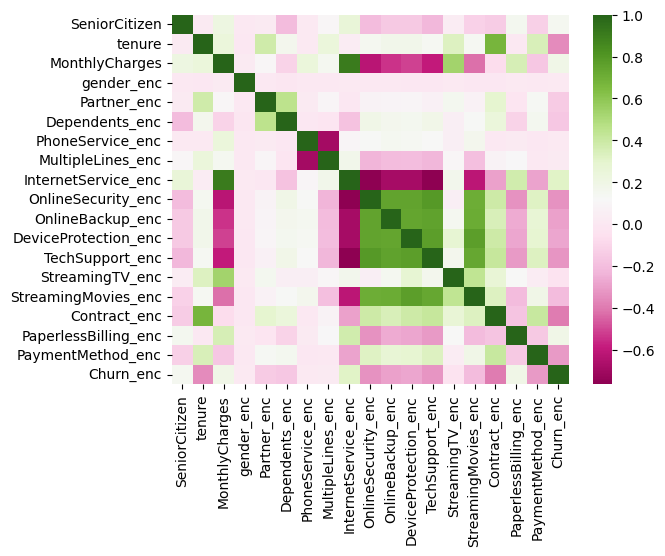

In [10]:
import seaborn as sns

sns.heatmap(corr, cmap="PiYG");

In [11]:
features = [x for x in df.columns if x in set(corr.columns) - {'Churn_enc'}]

In [12]:
df.dropna(inplace=True)

# Features and Labels
X = df[features]
y = df['Churn_enc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=10_000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7553802008608321
Confusion Matrix:
[[787 139]
 [202 266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       926
           1       0.66      0.57      0.61       468

    accuracy                           0.76      1394
   macro avg       0.73      0.71      0.72      1394
weighted avg       0.75      0.76      0.75      1394



In [13]:
def transform_input(input_dict: dict):
    res = {}
    for x in df.columns:
        if x not in input_dict:
            continue

        if x in encoding:
            res[f"{x}_enc"] = convert_values_to_int(x, encoding[col])

        else:
            res[x] = input_dict[x]

    return pd.DataFrame([res])


In [14]:

def get_pred_frame():
    return pd.DataFrame(
        [
            [
                SeniorCitizen,
                tenure,
                MonthlyCharges,
                gender,
                Partner,
                Dependents,
                PhoneService,
                MultipleLines,
                InternetService,
                OnlineSecurity,
                OnlineBackup,
                DeviceProtection,
                TechSupport,
                StreamingTV,
                StreamingMovies,
                Contract,
                PaperlessBilling,
                PaymentMethod,
            ]
        ],
        columns=[
            "SeniorCitizen",
            "tenure",
            "MonthlyCharges",
            "gender",
            "Partner",
            "Dependents",
            "PhoneService",
            "MultipleLines",
            "InternetService",
            "OnlineSecurity",
            "OnlineBackup",
            "DeviceProtection",
            "TechSupport",
            "StreamingTV",
            "StreamingMovies",
            "Contract",
            "PaperlessBilling",
            "PaymentMethod",
        ],
    )

In [18]:
input_data = {}

gender = "Male"
SeniorCitizen = 1
Partner = "Yes"
Dependents = "No"
tenure = 1
PhoneService = "No"
MultipleLines = "No phone service"
InternetService = "DSL"
OnlineSecurity = "No"
OnlineBackup = "Yes"
DeviceProtection = "No"
TechSupport = "No"
StreamingTV = "No"
StreamingMovies = "No"
Contract = "Month-to-month"
PaperlessBilling = "Yes"
PaymentMethod = "Electronic check"
MonthlyCharges = 2985
TotalCharges = 2985



In [19]:
pred_df = get_pred_frame()
for col in pred_df.columns:
    if col not in encoding:
        continue
    newcol = f"{col}_enc"
    pred_df[newcol] = pred_df[col].apply(lambda x: convert_values_to_int(x, encoding[col]))

In [21]:
["Churn" if model.predict(pred_df[features]) == 1 else "Not Churn"]

['Not Churn']